Use the following:
- Linear MV
- Ridge Regression
- Lasso Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Combo

Combine test and train for processing
- Add saleprice
- pairplot
- heatmap
- Lasso - reduce variables automatically
- Ridge

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.metrics import r2_score, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import LinearSVC

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.stats import skew, norm, probplot
from scipy.stats.stats import pearsonr
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dfs = [train, test]
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [3]:
# Make PoolQC and Fence boolean
for df in dfs:
    print(df.info())
    print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
print(train.columns)
train.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Find correlation of features with SalePrice
train.corr().SalePrice.abs().sort_values(ascending=False)
#OverallQual      0.790982 # Overall material and finish quality
#GrLivArea        0.708624 # Above grade (ground) living area square feet
#GarageCars       0.640409 # Size of garage in car capacity
#GarageArea       0.623431 # Size of garage in square feet
#TotalBsmtSF      0.613581 # Total square feet of basement area
#1stFlrSF         0.605852 # First Floor square feet
#FullBath         0.560664 # Full bathrooms above grade

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [6]:
train[train.TotalBsmtSF == 0].head()
train["HasBasement"] = train.TotalBsmtSF > 0
#train[["Id", "TotalBsmtSF", "HasBasement"]]

In [7]:
year_now = pd.tslib.Timestamp.now().year
train['Age'] = year_now - train["YearBuilt"]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
train[train.PoolArea > 0].count()
train["HasPool"] = train.PoolArea > 0
train[["Id", "PoolArea", "HasPool"]]

,Id,PoolArea,HasPool
0,1,0,False
1,2,0,False
2,3,0,False
3,4,0,False
4,5,0,False
5,6,0,False
6,7,0,False
7,8,0,False
8,9,0,False
9,10,0,False


In [9]:
print(test.columns)
test.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


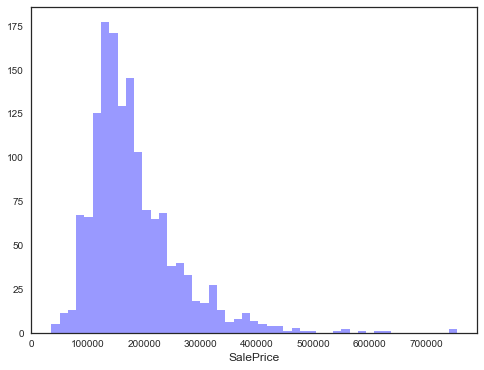

In [10]:
# SalePrice histogram
sns.distplot(train['SalePrice'], kde = False, color = 'b')

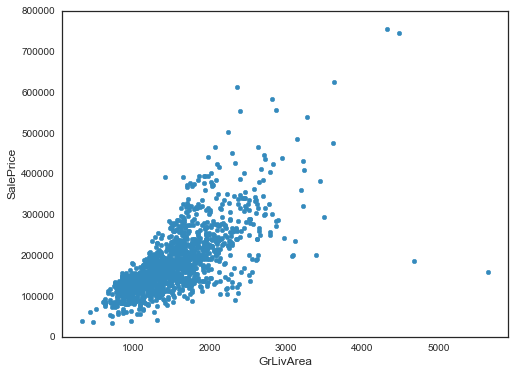

In [11]:
# Scatter plot GrLivArea/SalePrice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

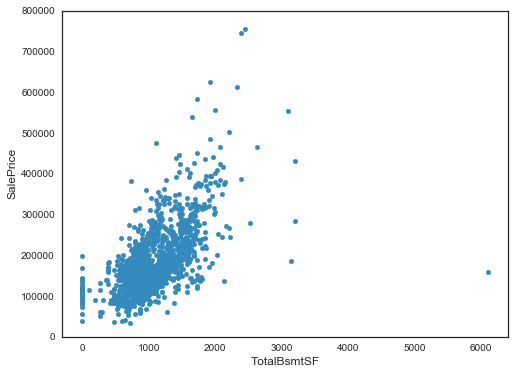

In [12]:
# Scatter plot TotalBsmtSF/SalePrice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

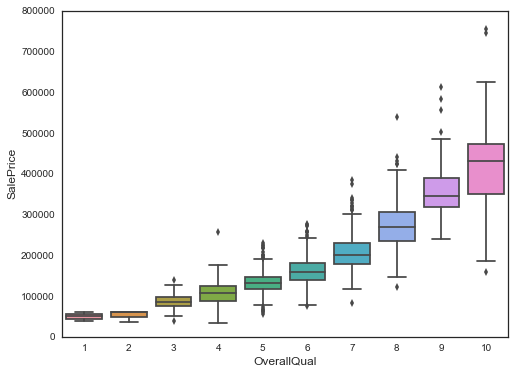

In [13]:
# Box plot OverallQual/SalePrice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [14]:
# Missing Data Function
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [15]:
missing_train = missing_data(train)
missing_test = missing_data(test)
missing_all = missing_data(all_data)

#missing_train.head(20)
#missing_test.head(20)
missing_all.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [16]:
# Dropped features
dropped_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train.drop(dropped_features, 1, inplace=True)
test.drop(dropped_features, 1, inplace=True)
all_data.drop(dropped_features, 1, inplace=True)

In [17]:
# Columns to replace NA with zeros
zero_cols = ['GarageType', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MasVnrArea']
def fill_na(df):
    for col in df.columns:
        if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
            if col in zero_cols:
                df[col].fillna(0, inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna('N/A', inplace=True)

In [18]:
# Fill NAs
fill_na(train)
fill_na(test)
fill_na(all_data)

# Verify
print(train.isnull().sum().max())
print(test.isnull().sum().max())
all_data.isnull().sum().max()

0
0


0

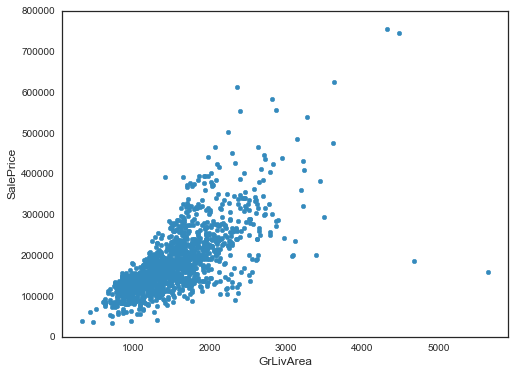

In [19]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [20]:
# Dummify code
print(train.SalePrice.head())
print(train.shape)
train_dummies = pd.get_dummies(train)
train_dummies.shape
x = train_dummies.drop('SalePrice', axis=1)
print(x.shape)
y = train_dummies.SalePrice
y.shape

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
(1460, 79)
(1460, 285)


(1460,)

In [21]:
# Training / Testing data split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.90, random_state=0)

In [22]:
def rmse(y, y_pred):
    return mean_squared_error(y, y_pred)**0.5

# A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y + 1)).mean())

In [23]:
# i.e. model = GradientBoostingRegressor().fit(x_train, y_train)
def score_model(model, x_train, y_train, x_test, y_test):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_RMSE = rmse(y_train, y_train_pred)
    test_RMSE = rmse(y_test, y_test_pred)
    train_RMSLE = rmsle(y_train, y_train_pred)
    test_RMSLE = rmsle(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(model)
    print("R^2 for the training data is", train_r2)
    print("R^2 for the testing data is", test_r2)
    print("RMSE for the training data is", train_RMSE)
    print("RMSE for the testing data is", test_RMSE)
    print("RMSLE for the training data is", train_RMSLE)
    print("RMSLE for the testing data is", test_RMSLE)

In [24]:
# input for model in x axis
x1_train = sm.add_constant(x_train)
x1_test = sm.add_constant(x_test)
ols = sm.OLS(y_train, x1_train.astype(float)).fit()

print(ols.summary()) # Get OLS summary of model
y_train_pred = ols.predict(x1_train)
y_test_pred = ols.predict(x1_test)
RMSE_OLS_train = rmse(y_train, y_train_pred)
RMSE_OLS_test = rmse(y_test, y_test_pred)
# RMSE ~135000 = Excellent ~250000 = Okay
print("RMSE OLS for the training data is: ", RMSE_OLS_train)
print("RMSE OLS for the testing data is: ", RMSE_OLS_test)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     66.82
Date:                Fri, 14 Apr 2017   Prob (F-statistic):               0.00
Time:                        14:06:17   Log-Likelihood:                -14876.
No. Observations:                1314   AIC:                         3.023e+04
Df Residuals:                    1077   BIC:                         3.145e+04
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Id                        0.41

In [25]:
# LinearRegression, LogisticRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
# Linear Regression
score_model(LinearRegression().fit(x_train, y_train), x_train, y_train, x_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R^2 for the training data is 0.936067147136
R^2 for the testing data is 0.843974930815
RMSE for the training data is 19979.6392528
RMSE for the testing data is 32744.8051307
RMSLE for the training data is 0.106691631086
RMSLE for the testing data is 0.180166068754


In [26]:
# Ridge
score_model(Ridge(alpha=.1).fit(x_train, y_train), x_train, y_train, x_test, y_test)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R^2 for the training data is 0.935174737957
R^2 for the testing data is 0.839153420501
RMSE for the training data is 20118.5992939
RMSE for the testing data is 33246.8981678
RMSLE for the training data is 0.106105318809
RMSLE for the testing data is 0.175421033599


In [27]:
# Lasso
score_model(Lasso(alpha=.2, max_iter=5000).fit(x_train, y_train), x_train, y_train, x_test, y_test)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R^2 for the training data is 0.936065014549
R^2 for the testing data is 0.845228336174
RMSE for the training data is 19979.9724771
RMSE for the testing data is 32613.0145328
RMSLE for the training data is 0.106637045029
RMSLE for the testing data is 0.17821330231


C:\Users\Josh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [28]:
# ElasticNet
score_model(ElasticNet().fit(x_train, y_train), x_train, y_train, x_test, y_test)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
R^2 for the training data is 0.835170086351
R^2 for the testing data is 0.784358048596
RMSE for the training data is 32080.6837374
RMSE for the testing data is 38495.6666481
RMSLE for the training data is 0.154311125759
RMSLE for the testing data is 0.13916649792


C:\Users\Josh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [29]:
# RandomForestRegressor
score_model(RandomForestRegressor().fit(x_train, y_train), x_train, y_train, x_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R^2 for the training data is 0.972922220144
R^2 for the testing data is 0.866445719748
RMSE for the training data is 13002.6576134
RMSE for the testing data is 30295.2209254
RMSLE for the training data is 0.070285960276
RMSLE for the testing data is 0.122462401259


In [30]:
# GradientBoostingRegressor
# Best test RMSLE so far ~0.11779461822
gbr = GradientBoostingRegressor().fit(x_train, y_train)
score_model(gbr, x_train, y_train, x_test, y_test)

gbr2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
score_model(gbr2, x_train, y_train, x_test, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R^2 for the training data is 0.968788956178
R^2 for the testing data is 0.862468060222
RMSE for the training data is 13959.8177035
RMSE for the testing data is 30743.0536179
RMSLE for the training data is 0.088021692978
RMSLE for the testing data is 0.11779461822
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_lea

In [31]:
# RidgeCV
score_model(RidgeCV().fit(x_train, y_train), x_train, y_train, x_test, y_test)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
R^2 for the training data is 0.904427070627
R^2 for the testing data is 0.809487507794
RMSE for the training data is 24428.2889896
RMSE for the testing data is 36183.197896
RMSLE for the training data is 0.124189163062
RMSLE for the testing data is 0.149609346848


In [32]:
# LassoCV
score_model(LassoCV().fit(x_train, y_train), x_train, y_train, x_test, y_test)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
R^2 for the training data is 0.717056529468
R^2 for the testing data is 0.766760408071
RMSE for the training data is 42031.5531545
RMSE for the testing data is 40035.6012212
RMSLE for the training data is 0.196829134371
RMSLE for the testing data is 0.166393451326


In [33]:
# LassoLarsCV
score_model(LassoLarsCV(cv=3, max_iter=50, max_n_alphas=50).fit(x_train, y_train), x_train, y_train, x_test, y_test)

LassoLarsCV(copy_X=True, cv=3, eps=2.2204460492503131e-16, fit_intercept=True,
      max_iter=50, max_n_alphas=50, n_jobs=1, normalize=True,
      positive=False, precompute='auto', verbose=False)
R^2 for the training data is 0.900658103616
R^2 for the testing data is 0.853747544639
RMSE for the training data is 24905.3026347
RMSE for the testing data is 31702.7401685
RMSLE for the training data is 0.133205677205
RMSLE for the testing data is 0.130084162902


C:\Users\Josh\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 39 iterations, i.e. alpha=8.762e+01, with an active set of 37 regressors, and the smallest cholesky pivot element being 1.825e-08
  ConvergenceWarning)


In [34]:
# Convert all_data categorical variable into dummies for making final predictions
all_data = pd.get_dummies(all_data)

X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [35]:
# R2 training scores for models
reg = LinearRegression()
regmodel = reg.fit(X_train, y)
print(regmodel.score(X_train, y))
y_predtrain = regmodel.predict(X_train)
RMSEtrain = rmse(y, y_predtrain)
print("RMSE Linear Regression Model for the training data is: ", RMSEtrain)

ridgereg = Ridge(alpha=.1)
ridgereg.fit(X_train, y)
print(ridgereg.score(X_train, y))
y_predtrain_ridge = ridgereg.predict(X_train)
RMSEtrain_ridge = rmse(y, y_predtrain_ridge)
print("RMSE Ridge Model for the training data is: ", RMSEtrain_ridge)

lassoreg = Lasso(alpha=.1, tol=0.001)
lassoreg.fit(X_train, y)
print(lassoreg.score(X_train, y))
y_predtrain_lasso = lassoreg.predict(X_train)
RMSEtrain_lasso = rmse(y, y_predtrain_lasso)
print("RMSE Lasso Model for the training data is ", RMSEtrain_lasso)

elasticreg = ElasticNet()
elasticreg.fit(X_train, y)
print(elasticreg.score(X_train, y))
y_predtrain_elastic = elasticreg.predict(X_train)
RMSEtrain_elastic = rmse(y, y_predtrain_elastic)
print("RMSE ElasticNet Model for the training data is ", RMSEtrain_elastic)

0.931032315844
RMSE Linear Regression Model for the training data is:  20855.8050239
0.930176155261
RMSE Ridge Model for the training data is:  20984.8570876


C:\Users\Josh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.931027804649
RMSE Lasso Model for the training data is  20856.4871047
0.831523046104
RMSE ElasticNet Model for the training data is  32596.7564295


In [36]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
gbr2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                 min_samples_leaf=15, min_samples_split=10, loss='huber')

rfr_train = rfr.fit(x_train, y_train)
gbr_train = gbr.fit(x_train, y_train)
gbr2_train = gbr2.fit(x_train, y_train)
print(rfr_train.score(x_test, y_test))
print(gbr_train.score(x_test, y_test)) # Higher scoring
print(gbr2_train.score(x_test, y_test))

0.85850614012
0.87971274354
0.871007557745
0.966321039665
0.956596942096


In [ ]:
gbr_pred = gbr.fit(X_train, y)
print(gbr_pred.score(X_train, y))

#gbr2_pred = gbr2.fit(X_train, y)
#print(gbr2_pred.score(X_train, y))

# Make final predictions
y_pred = gbr_pred.predict(X_test)

In [ ]:
# Final submission
solution = pd.DataFrame({"Id":test.Id, "SalePrice":y_pred})
solution.to_csv("solution.csv", index = False)